In [29]:
from PIL import Image, ImageFilter
from skimage.util import random_noise
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as T

In [2]:
img_path = './data/train_images/tiles/0a4b7a7499ed55c71033cefb0765e93d_000.png'

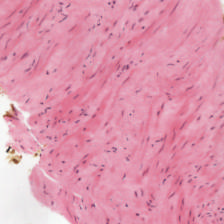

In [3]:
img = Image.open(img_path)
img

# PIL transforms

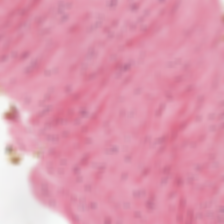

In [4]:
img.filter(ImageFilter.BoxBlur(3))

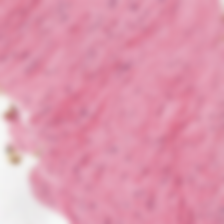

In [5]:
img.filter(ImageFilter.GaussianBlur(3))

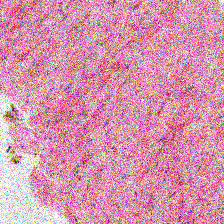

In [35]:
Image.fromarray(np.clip(img + np.random.normal(0, 50, size=(*img.size, 3)), 0, 255).astype(np.uint8))

# Numpy

### Gaussian noise

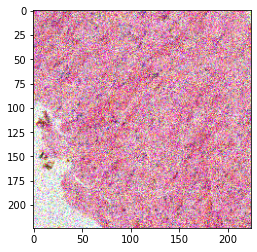

In [25]:
plt.imshow(np.clip(img + np.random.normal(0, 50, size=(*img.size, 3)), 0, 255).astype(int))

# Torchvision transforms

In [111]:
def plot(transform):
    fig, axs = plt.subplots(2,5,figsize=(16,8))
    plt.suptitle('mean = {}\n std  =  {}'.format(np.round(np.mean(np.asarray(img), axis=(0,1)) / 255, 3), 
                                              np.round(np.std( np.asarray(img), axis=(0,1)) / 255, 3)))
    for ax in axs.flatten():
        timg = transform(img)
        ax.imshow(timg)
        ax.set_title('mean = {}\n std  =  {}'.format(np.round(np.mean(np.asarray(timg), axis=(0,1)) / 255, 3), 
                                                  np.round(np.std( np.asarray(timg), axis=(0,1)) / 255, 3)),
                     fontsize=10)

## ColorJitter

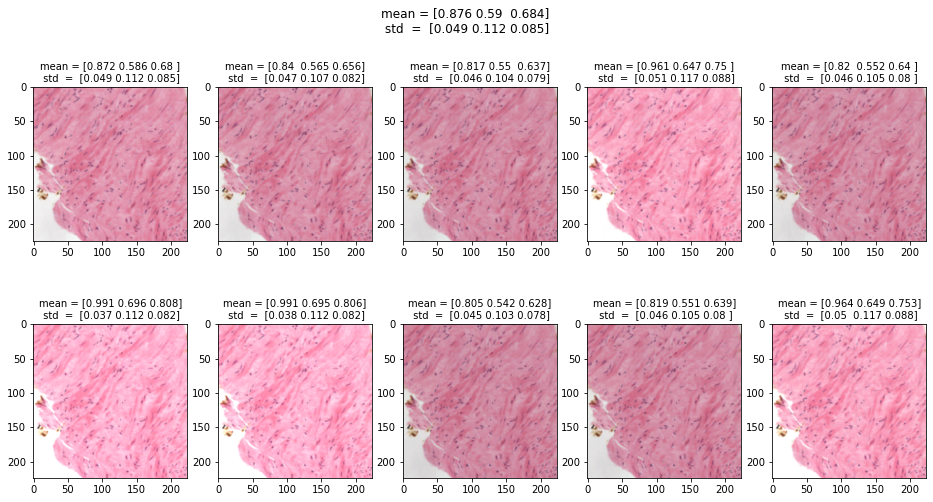

In [112]:
plot(T.ColorJitter(brightness=0.2))

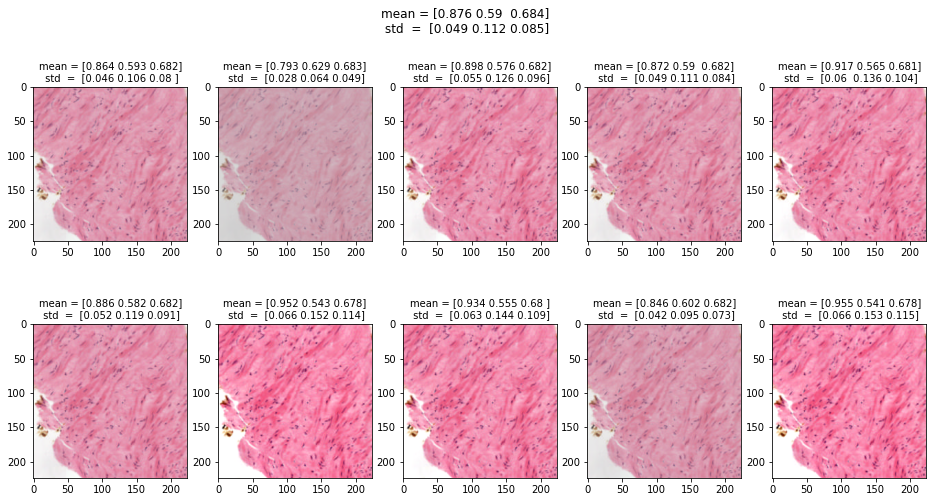

In [113]:
plot(T.ColorJitter(contrast=0.5))

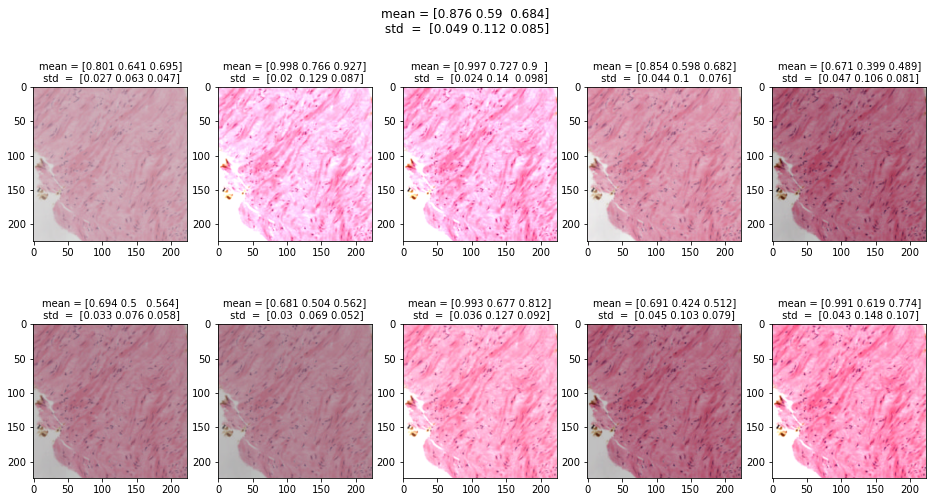

In [114]:
plot(T.ColorJitter(brightness=0.5, contrast=0.5))

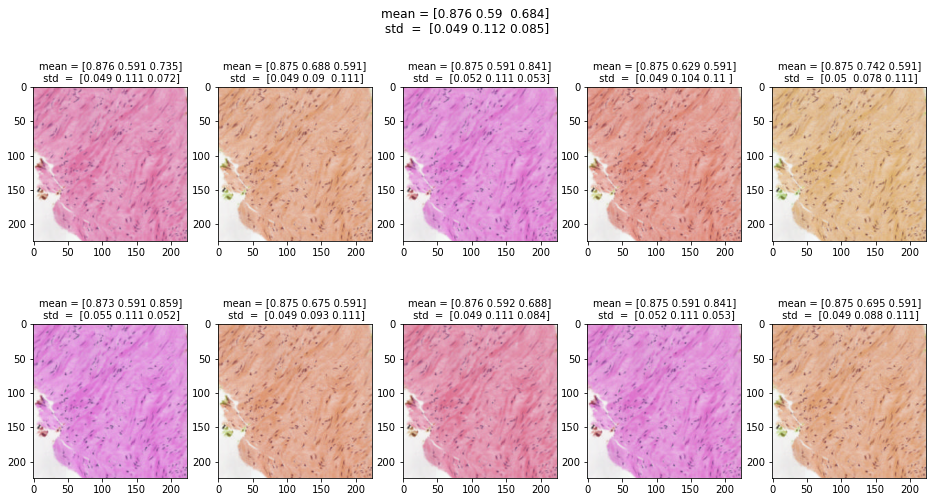

In [115]:
plot(T.ColorJitter(hue=0.15))

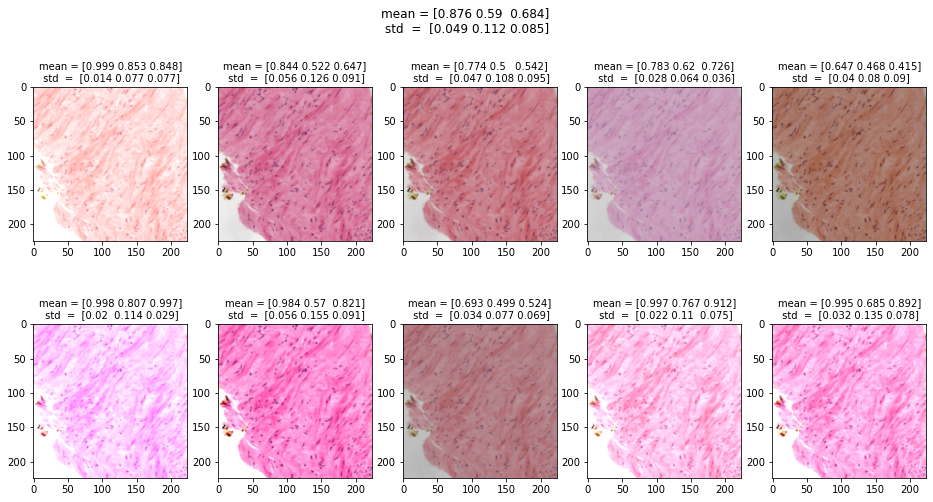

In [123]:
plot(T.ColorJitter(brightness=0.5, contrast=0.5, hue=0.1))

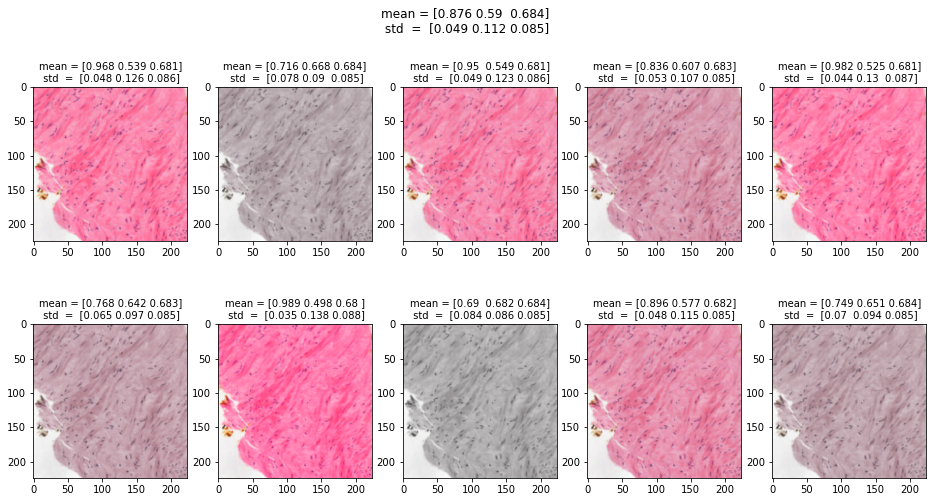

In [116]:
plot(T.ColorJitter(saturation=1))

### RandomAffine

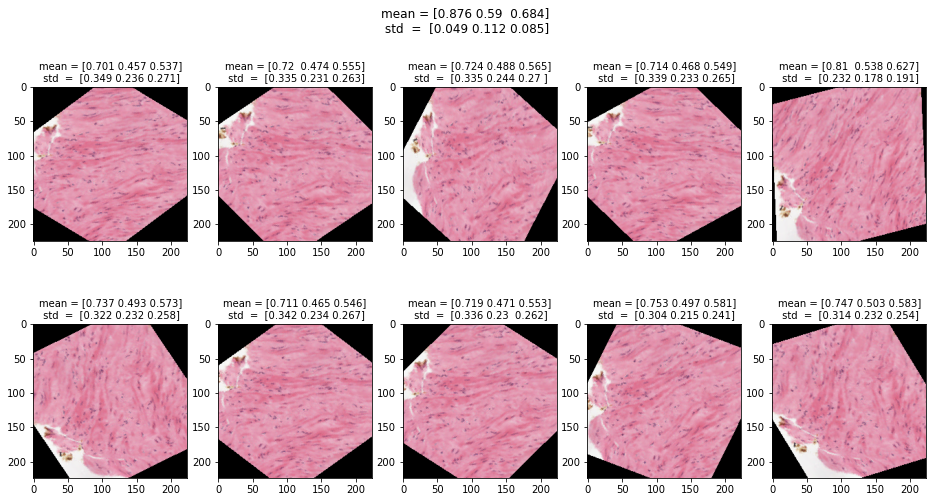

In [117]:
plot(T.RandomAffine(degrees=(-45,45), shear=(-25,25)))

### RandomPerspective

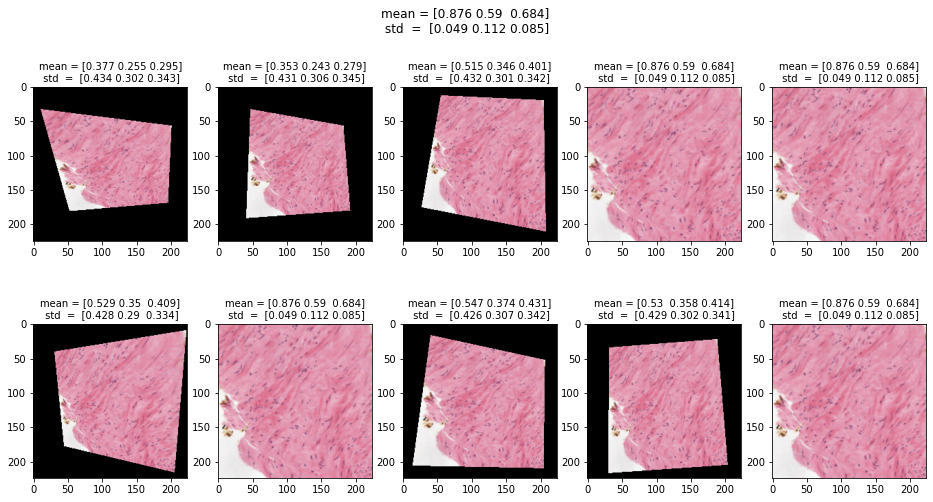

In [118]:
plot(T.RandomPerspective())

### RandomRotation

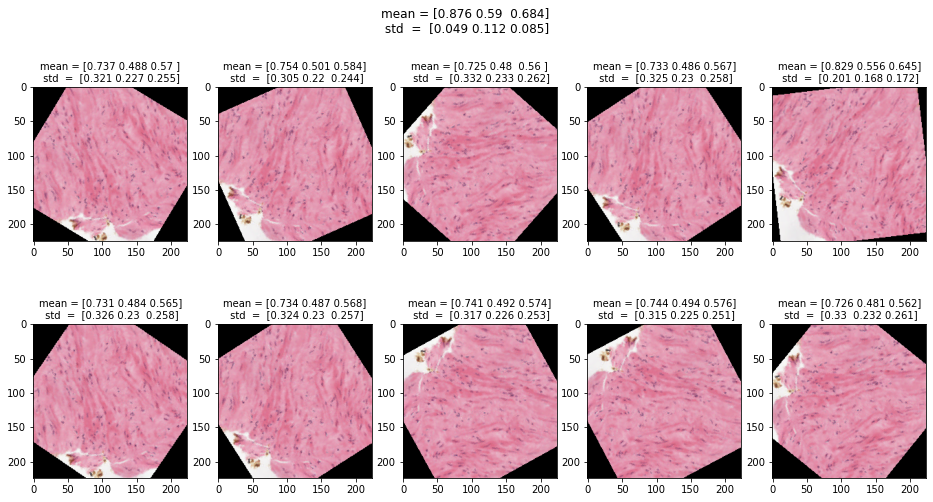

In [119]:
plot(T.RandomRotation(90))

### RandomErasing

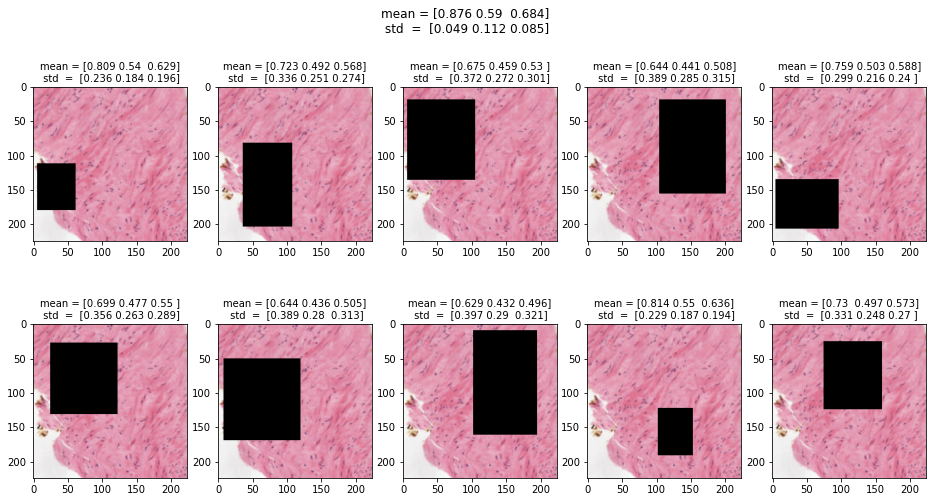

In [127]:
plot(T.Compose([T.ToTensor(), T.RandomErasing(p=1, scale=(0.02,0.3), ratio=(0.75, 1.75)), T.ToPILImage()]))